In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

In [36]:
df =  pd.concat([pd.read_csv(r"dataset\my_test_features.csv"),
                 pd.read_csv(r"dataset\my_train_features.csv")])

In [37]:
df.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,backward,upperside,1197.3,left,small,Agreeableness
1,vertical,baseline,706.1,right,small,Agreeableness
2,backward,upperside,1604.0,right,small,Agreeableness
3,vertical,lowerside,1214.3,right,medium,Agreeableness
4,backward,upperside,1046.6,left,small,Agreeableness


In [38]:
letter_slant_mapping = {'backward': -1, 'forward': 1, 'vertical': 0}
line_slant_mapping = {'lowerside': -1, 'baseline': 0, 'upperside': 1}
margin_slope_mapping = {'left': -1, 'straight': 0, 'right': 1}
word_spacing_mapping = {'small': -1, 'medium': 0, 'large': 1}

In [39]:
df["letter_slant"] = df["letter_slant"].map(letter_slant_mapping)
df["line_slant"] = df["line_slant"].map(line_slant_mapping)
df["margin_slope"] = df["margin_slope"].map(margin_slope_mapping)
df["word_spacing"] = df["word_spacing"].map(word_spacing_mapping)

In [40]:
df.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,-1,1,1197.3,-1,-1,Agreeableness
1,0,0,706.1,1,-1,Agreeableness
2,-1,1,1604.0,1,-1,Agreeableness
3,0,-1,1214.3,1,0,Agreeableness
4,-1,1,1046.6,-1,-1,Agreeableness


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 176
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    int64  
 1   line_slant    221 non-null    int64  
 2   letter_size   221 non-null    float64
 3   margin_slope  221 non-null    int64  
 4   word_spacing  221 non-null    int64  
 5   personality   221 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 12.1+ KB


In [42]:
df.isnull().sum()

letter_slant    0
line_slant      0
letter_size     0
margin_slope    0
word_spacing    0
personality     0
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 176
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    int64  
 1   line_slant    221 non-null    int64  
 2   letter_size   221 non-null    float64
 3   margin_slope  221 non-null    int64  
 4   word_spacing  221 non-null    int64  
 5   personality   221 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 12.1+ KB


In [45]:
X = df.drop("personality",axis=1)
y = df["personality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
print(f"{X_train.shape, y_train.shape, X_test.shape, y_test.shape}")

((198, 5), (198,), (23, 5), (23,))


In [46]:
rf = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf

array(['Agreeableness', 'Extraversion', 'Agreeableness', 'Openness',
       'Neuroticism', 'Openness', 'Openness', 'Openness', 'Openness',
       'Agreeableness', 'Agreeableness', 'Neuroticism',
       'Conscientiousness', 'Openness', 'Openness', 'Openness',
       'Neuroticism', 'Openness', 'Conscientiousness',
       'Conscientiousness', 'Agreeableness', 'Neuroticism',
       'Agreeableness'], dtype=object)

In [47]:
print(f"Accuracy for Random Forest: {round(accuracy_score(y_test, y_pred_rf), 2) * 100}%")

Accuracy for Random Forest: 30.0%


In [48]:
accuracies = []
for i in range(1, X_train.shape[0] + 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
max_accuracy_knn = max(accuracies)
max_index_knn = accuracies.index(max_accuracy_knn)
print(f"Best accuracy {round(max_accuracy_knn, 2) * 100}% for KNN with k = {max_index_knn + 1}")

Best accuracy 43.0% for KNN with k = 35


In [49]:
knn = KNeighborsClassifier(n_neighbors=max_index_knn + 1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array(['Openness', 'Agreeableness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Agreeableness', 'Openness',
       'Conscientiousness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Agreeableness', 'Openness',
       'Agreeableness', 'Openness', 'Openness', 'Openness', 'Openness'],
      dtype=object)

In [50]:
print(f"Accuracy for KNN: {round(accuracy_score(y_test, y_pred_knn), 2) * 100}%")

Accuracy for KNN: 43.0%


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (5).

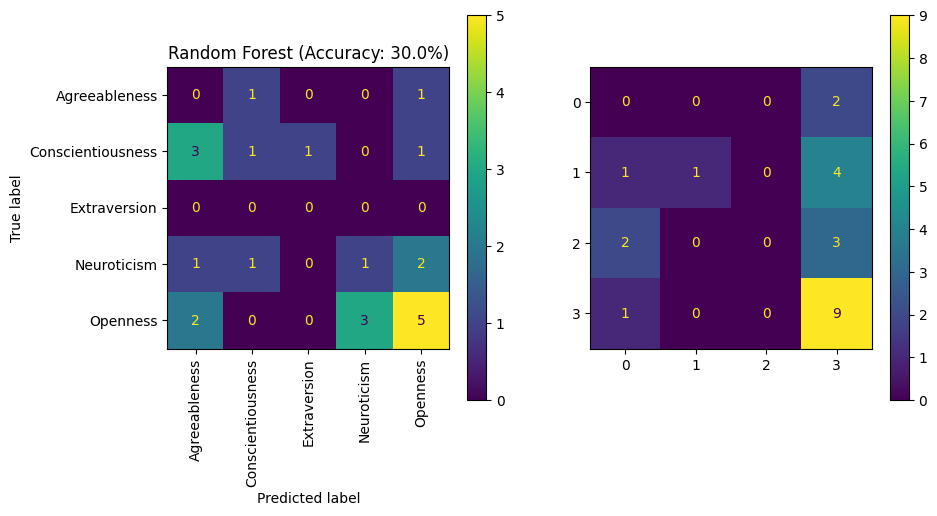

In [51]:
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_knn = confusion_matrix(y_test, y_pred_knn)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp1.plot(ax=ax1, xticks_rotation="vertical")
ax1.set_title(f"Random Forest (Accuracy: {round(accuracy_score(y_test, y_pred_rf), 2) * 100}%)")

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp2.plot(ax=ax2, xticks_rotation="vertical")
ax2.set_title(f"KNN (Accuracy: {round(accuracy_score(y_test, y_pred_knn), 2) * 100}%)")

plt.tight_layout()
plt.show()
